Original length of sample data is 4561
110 tests with Result, IPAddress, TotalScore = NaN dropped
Extra ip address dropped in 36 tests


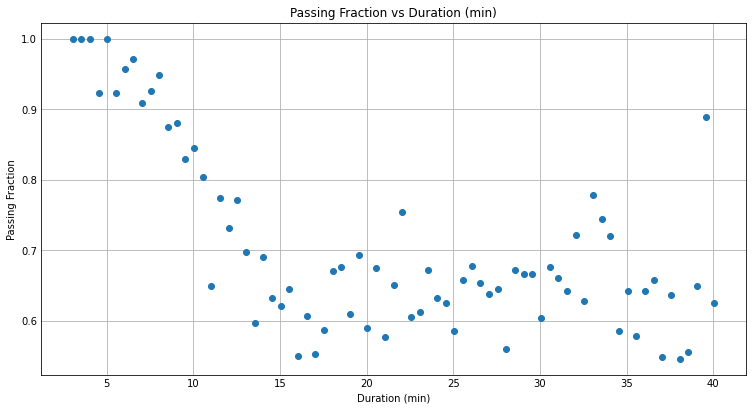

In [6]:
# Show variation of success vs time spent taking the driver's test.
# The success rate is averaged over bins of time taken to do the test.
# The bins are calculated by dividing the longest duration by some integer.
# See dmv_test/passing_fraction.py

import dmv_test_input
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import mplcursors

def passing_fraction(df, limits):
    # passing_fraction: DataFrame with columns duration and fraction of passed tests 
    # input:
    #    df ...... dmv dataframe with columns duration and Result
    #    limits .. list of (upper, lower) bounds of duration intervals as produced 
    #              by function duration_intervals
    # DataFrame:
    #    duration ... average of the upper and lower bounds of each interval
    #    fraction ... # of tests passed over total tests taken during the duration period
    pf = []
    for lim in limits:
        np = df[(df.duration>=lim[0]) & (df.duration<lim[1]) & (df.Result=="P")]["duration"].count()
        nf = df[(df.duration>=lim[0]) & (df.duration<lim[1]) & (df.Result!="P")]["duration"].count()
        duration = 0.5*(lim[0] + lim[1])
        try:
            fraction = float(np)/( float(np) + float(nf) )
        except:
            fraction = 0
        pf.append( (duration, fraction) )
    return pd.DataFrame({
        "duration": [x[0] for x in pf],
        "fraction": [x[1] for x in pf]
    })

def duration_intervals(lo=5., hi=100., inc=5.):
    r = np.arange(lo, hi+0.01*(hi-lo)/inc, inc)
    return [ (r[i], r[i+1]) for i in range(len(r)-1) ] 

def plot_spearman(df):
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.plot(df.duration, df.fraction, "o")
    mplcursors.cursor(hover=True)
    ax.set_title("Passing Fraction vs Duration (min)")
    ax.set_xlabel("Duration (min)")
    ax.set_ylabel("Passing Fraction")
    plt.grid(visible=True)
    plt.show() 

def main():
    df, risk = dmv_test_input.dmv_risk_input()

    limits = duration_intervals(lo=2.8, hi=40., inc=0.5)
    pf = passing_fraction(df, limits)

    plot_spearman(pf)

main()